(-0.005458537477836473, -0.0010813521522491478)
(0.011517501788174582, 0.0017808512668100918)
(-0.003903994517072489, -0.0017200790813735477)
(0.011418771684682404, -0.002215989587568319)
(0.005277727337605719, 0.0016646608379430052)
(-0.0005833269174102204, -0.0011329966801853471)
(-0.0006744885925283524, -0.0003166364016479431)
(-0.0011032462135423709, -0.0011617221112371352)
(0.0005740418103781149, -0.002060461618774878)
(0.0007801423773846574, -0.0016734993993546615)


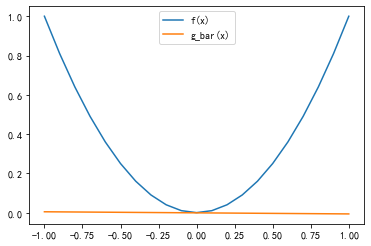

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
def f(x):
    return x ** 2

#模拟求出系数
def simulation(n):
    a = 0
    b = 0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1 = np.random.uniform(-1, 1)
        x2 = np.random.uniform(-1, 1)
        a1 = (x1 + x2)
        b1 = - x1 * x2
        a += a1
        b += b1
    return a / n, b / n

    #比较下10000次以上的结果
n = range(10 ** 4, 10 ** 5+1, 10 ** 4)
result =[]
for i in n:
    temp = simulation(i)
    print(temp)
    result.append(temp)
    
#选择第一组数据并作图
a, b = result[0]
x1 = np.arange(-1, 1.1, 0.1)
y1 = [f(i) for i in x1]
x2 = np.array([-1, 1])
y2 = a * x2 + b

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(['f(x)','g_bar(x)'])
plt.show()

In [3]:


#计算积分
#定义误差函数
def s1(x, x1, x2):
    a = (x1 + x2)
    b = - x1 * x2
    y = f(x)
    y1 = a * x + b
    return 1 / 8 * (y - y1) ** 2
print(integrate.tplquad(s1, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y:
1))

#bias
def bias(x):
    y1 = a * x + b
    y2 = f(x)
    return (y1 - y2) ** 2 / 2
print(integrate.quad(bias, -1, 1))

#var
def var(x, x1, x2):
    yavg = a * x + b
    a1 = (x1 + x2)
    b1 = -x1 * x2
    yrea = a1 * x + b1
    return 1 / 8 * (yavg - yrea) ** 2
print(integrate.tplquad(var, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y:
1))


(0.5333333333333333, 8.785771717918444e-15)
(0.20340463787213914, 2.2582451228119097e-15)
(0.33337370288538704, 6.393304785214921e-15)
